In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('all_energy_statistics.csv')

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.close("all")

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [8]:
#Przeszukuję dane pod kątem jakichś podejrzanych wartości/braków itd

data.sample(10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
404543,Mozambique,Gas Oil/ Diesel Oil - Consumption by other man...,2003,"Metric tons, thousand",72.000,NaN,gas_oil_diesel_oil
702126,Albania,Lubricants - Total energy supply,2004,"Metric tons, thousand",51.000,NaN,lubricants
729638,French Polynesia,Motor Gasoline - Final consumption,1994,"Metric tons, thousand",43.462,1.0,motor_gasoline
1057300,Syrian Arab Republic,"Electricity - Consumption by manufacturing, co...",2014,"Kilowatt-hours, million",5298.000,NaN,total_electricity
62801,Czechia,Bitumen - Final consumption,2001,"Metric tons, thousand",373.000,NaN,bitumen
1049175,Romania,Electricity - Consumption by households,1992,"Kilowatt-hours, million",7596.000,NaN,total_electricity
496962,Japan,"Hard coal - consumption by manufacturing, cons...",2006,"Metric tons, thousand",16704.000,NaN,hard_coal
30887,Malaysia,"Bagasse - Consumption by other manuf., const. ...",1999,"Metric tons, thousand",349.000,NaN,bagasse
489346,India,Gasworks Gas - Production,2011,Terajoules,825.000,NaN,gasworks_gas
118540,Serbia,Brown coal - Transformation in autoproducer CH...,2010,"Metric tons, thousand",15.000,NaN,brown_coal


In [9]:
#Lata 1990-2014 w array
years = data['year'].unique()

In [10]:
# Sprawdzam jakie są kraje
data['country_or_area'].unique()

array(['Austria', 'Belgium', 'Czechia', 'Finland', 'France', 'Greece',
       'Hungary', 'Italy', 'Korea, Republic of', 'Netherlands', 'Romania',
       'Serbia', 'Slovakia', 'Ukraine', 'United Kingdom', 'United States',
       'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile', 'Croatia',
       'Iran (Islamic Rep. of)', 'Jordan', 'Lithuania', 'Mexico', 'Oman',
       'Other Asia', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'T.F.Yug.Rep. Macedonia', 'Turkey', 'Uzbekistan',
       'Argentina', 'Colombia', 'Germany', 'Norway', 'Australia',
       'China, Macao SAR', 'Japan', 'Denmark', 'Ireland', 'Philippines',
       'Bangladesh', 'Eritrea', 'Ethiopia', 'Lesotho', 'Nepal', 'Niger',
       'Pakistan', 'Serbia and Montenegro', 'Tunisia', 'Botswana',
       'Georgia', 'Republic of Moldova', 'Peru', 'South Africa',
       'Iceland', 'Latvia', 'Luxembourg', 'Cuba', 'Kyrgyzstan',
       'Singapore', 'Thailand', 'United Arab Emirates', 'Uruguay',
       'Armenia', 'Fiji', 

In [11]:
# Sprawdzam jakie mamy kategorie
categories = data['category'].unique()
categories

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [12]:
# Sprawdzam w jakiej jednostce wyrażona jest każda z kategorii

category_unit = data[['unit', 'category']].drop_duplicates(subset = ['unit', 'category'])
category_unit

,unit,category
0,"Metric tons, thousand",additives_and_oxygenates
3018,Terajoules,animal_waste
4940,"Metric tons, thousand",anthracite
9834,"Metric tons, thousand",aviation_gasoline
28005,"Metric tons, thousand",bagasse
40584,"Metric tons, thousand",biodiesel
45152,Terajoules,biogases
56037,"Metric tons, thousand",biogasoline
59908,"Metric tons, thousand",bitumen
80651,Terajoules,black_liquor


In [13]:
# Kategorie wyrażone w kilowatogodzinach (źródła energii - podzielone poniżej)

category_unit[category_unit['unit'].str.contains('^Kilowatt')==True]

,unit,category
204398,"Kilowatts, thousand",electricity_net_installed_capacity_of_electric...
256641,"Kilowatt-hours, million",falling_water
490912,"Kilowatt-hours, million",geothermal
563371,"Kilowatt-hours, million",hydro
854930,"Kilowatt-hours, million",nuclear_electricity
1025748,"Kilowatt-hours, million",solar_electricity
1032106,"Kilowatt-hours, million",thermal_electricity
1037595,"Kilowatt-hours, million",tide_wave_and_ocean_electricity
1037653,"Kilowatt-hours, million",total_electricity
1188115,"Kilowatt-hours, million",wind_electricity


In [14]:
# Kategorie wyrażone w tonach (to jest grupa paliw)

fuels = category_unit[category_unit['unit'].str.contains('Metric tons')==True]

fuels

,unit,category
0,"Metric tons, thousand",additives_and_oxygenates
4940,"Metric tons, thousand",anthracite
9834,"Metric tons, thousand",aviation_gasoline
28005,"Metric tons, thousand",bagasse
40584,"Metric tons, thousand",biodiesel
56037,"Metric tons, thousand",biogasoline
59908,"Metric tons, thousand",bitumen
96768,"Metric tons, thousand",brown_coal_briquettes
102671,"Metric tons, thousand",brown_coal
122400,"Metric tons, thousand",charcoal


In [15]:
# Kategorie wyrażone w terajulach

category_unit[category_unit['unit'].str.contains('Terajoules')==True]

,unit,category
3018,Terajoules,animal_waste
45152,Terajoules,biogases
80651,Terajoules,black_liquor
84805,Terajoules,blast_furnace_gas
152645,Terajoules,coke_oven_coke
198313,Terajoules,direct_use_of_geothermal_heat
200749,Terajoules,direct_use_of_solar_thermal_heat
484070,Terajoules,gasworks_gas
533715,Terajoules,heat
567115,Terajoules,industrial_waste


In [16]:
category_unit[category_unit['unit'].str.contains('Cubic metres')==True]


,unit,category
332735,"Cubic metres, thousand",fuelwood


In [17]:
category_unit[category_unit['unit'].str.contains('^Kilowatt')==True].category.unique()

array(['electricity_net_installed_capacity_of_electric_power_plants',
       'falling_water', 'geothermal', 'hydro', 'nuclear_electricity',
       'solar_electricity', 'thermal_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity'], dtype=object)

In [18]:
#Podział źródeł na podstawie jednostek - nas interesują kilowatogodziny

energy = ['electricity_net_installed_capacity_of_electric_power_plants',
       'falling_water', 'geothermal', 'hydro', 'nuclear_electricity',
       'solar_electricity', 'thermal_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity']

renewables = ['falling_water', 'geothermal', 'hydro', 
       'solar_electricity',
       'tide_wave_and_ocean_electricity',
       'wind_electricity']

nuclear = ['nuclear_electricity']

clean_energy = renewables + nuclear

fossil_energy = ['thermal_electricity'] #czyli jeśli dobrze rozumiem wszystko co z paliw kopalniach tj. węgiel, gaz itd. 

In [19]:
#Podział kolumny commodity_transaction

split_commodities = data.commodity_transaction.str.split(" - | – ",  expand=True)
split_commodities.head()

,0,1,2
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [20]:
# Nadaję nazwy podzielonym kolumnom

split_commodities.columns = ["commodity","transaction_type","additional_transaction_info"]
split_commodities.head()

,commodity,transaction_type,additional_transaction_info
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [21]:
# Łączę podzielone kolumny z danymi 

data = pd.concat([data, 
                split_commodities.commodity.str.lower(),
                split_commodities.transaction_type,
                split_commodities.additional_transaction_info.str.lower()], 
               axis=1)

data.head(5)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None


In [22]:
#Filtruję rekordy po krajach które będę analizować:
Polska = data[data['country_or_area'] == 'Poland']
Niemcy = data[data['country_or_area'] == 'Germany']
Dania = data[data['country_or_area'] == 'Denmark']
Francja = data[data['country_or_area'] == 'France']

#Wyświetlam Polskę
Polska.head(5)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
441,Poland,Additives and Oxygenates - Imports,2014,"Metric tons, thousand",79.0,NaN,additives_and_oxygenates,additives and oxygenates,Imports,None
442,Poland,Additives and Oxygenates - Imports,2013,"Metric tons, thousand",75.0,NaN,additives_and_oxygenates,additives and oxygenates,Imports,None
443,Poland,Additives and Oxygenates - Imports,2012,"Metric tons, thousand",66.0,NaN,additives_and_oxygenates,additives and oxygenates,Imports,None
444,Poland,Additives and Oxygenates - Imports,2011,"Metric tons, thousand",24.0,NaN,additives_and_oxygenates,additives and oxygenates,Imports,None
445,Poland,Additives and Oxygenates - Imports,2010,"Metric tons, thousand",52.0,NaN,additives_and_oxygenates,additives and oxygenates,Imports,None


In [23]:
# Na przykładzie Polski wymieniam wszystkie commodity_transaction związane z energetyką (jednostka - kilowatogodziny)
Polska[Polska.category.isin(energy)][['commodity_transaction','quantity']].groupby('commodity_transaction').sum().sort_values('quantity', ascending = False)
Polska[Polska.category.isin(energy)]['commodity_transaction'].unique()

array(['Electricity generating capacity - From other sources - Autoproducers',
       'Electricity generating capacity - From other sources - Total',
       'Electricity generating capacity - Pumped hydro - Main activity producers',
       'Electricity generating capacity - Pumped hydro - Total',
       'Electricity generating capacity - Solar PV - Autoproducers',
       'Electricity generating capacity - Solar PV - Total',
       'Electricity - net installed capacity of electric power plants, public combustible fuels',
       'Electricity - net installed capacity of electric power plants, public hydro',
       'Electricity - net installed capacity of electric power plants, public wind',
       'Electricity - net installed capacity of electric power plants, self-producer combustible fuels',
       'Electricity - net installed capacity of electric power plants, self-producer hydro',
       'Electricity - net installed capacity of electric power plants, self-producer solar',
       'Elec

In [24]:
not_interesting = ['Electricity - net production', 'Electricity - total production, autoproducer', 'Electricity - total production, main activity']

In [25]:
#Filtruję informacje - tylko dla Polski, tylko energia, tylko produkcja + Usuwam te informacje które się powtarzają/nas nie interesują 

Polska_filtered = Polska[(Polska.category.isin(energy)) & (~Polska['commodity_transaction'].isin(not_interesting)) & (Polska.transaction_type.str.contains('production'))][['commodity_transaction','year','quantity']].sort_values(['year','commodity_transaction'], ascending = True)

In [26]:
# Jakie całkowite zużycie roczne?
Polska_gross = Polska_filtered[Polska_filtered['commodity_transaction'] == 'Electricity - Gross production'][['year','quantity']]
Polska_gross.head(5)

,year,quantity
1106782,1990,136311.0
1106781,1991,134714.0
1106780,1992,132750.0
1106779,1993,133867.0
1106778,1994,135347.0


In [27]:
#Łączę tabele - odpowiednik LEFT JOIN w SQL (cel: automatyczne wyliczanie %share) 
Polska_final = Polska_filtered.merge(Polska_gross, how='left', on='year')
Polska_final.head(5)

,commodity_transaction,year,quantity_x,quantity_y
0,Electricity - Gross production,1990,136311.0,136311.0
1,Electricity - total hydro production,1990,3313.0,136311.0
2,Electricity - total thermal production,1990,132998.0,136311.0
3,Electricity - Gross production,1991,134714.0,134714.0
4,Electricity - total hydro production,1991,3411.0,134714.0


In [28]:
#Zmieniam automatycznie nnadane nazwy kolumn
Polska_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)

In [29]:
#Dodaję wyliczenie %share
Polska_final['%share'] = Polska_final['quantity']/Polska_final['total_quantity']*100

In [30]:
Polska_final.head(5)

,commodity_transaction,year,quantity,total_quantity,%share
0,Electricity - Gross production,1990,136311.0,136311.0,100.000000
1,Electricity - total hydro production,1990,3313.0,136311.0,2.430471
2,Electricity - total thermal production,1990,132998.0,136311.0,97.569529
3,Electricity - Gross production,1991,134714.0,134714.0,100.000000
4,Electricity - total hydro production,1991,3411.0,134714.0,2.532031


In [31]:
#Usuwam niepotrzebną kolumnę
Polska_final.drop(columns=['total_quantity'], inplace=True)

In [32]:
#I voila
Polska_final

,commodity_transaction,year,quantity,%share
0,Electricity - Gross production,1990,136311.0,100.000000
1,Electricity - total hydro production,1990,3313.0,2.430471
2,Electricity - total thermal production,1990,132998.0,97.569529
3,Electricity - Gross production,1991,134714.0,100.000000
4,Electricity - total hydro production,1991,3411.0,2.532031
5,Electricity - total thermal production,1991,131303.0,97.467969
6,Electricity - Gross production,1992,132750.0,100.000000
7,Electricity - total hydro production,1992,3570.0,2.689266
8,Electricity - total thermal production,1992,129180.0,97.310734
9,Electricity - Gross production,1993,133867.0,100.000000


In [33]:
Polska_hydro = Polska_final[Polska_final['commodity_transaction'] == 'Electricity - total hydro production']
Polska_thermal = Polska_final[Polska_final['commodity_transaction'] == 'Electricity - total thermal production']
Polska_tide = Polska_final[Polska_final['commodity_transaction'] == 'Electricity - total tide, wave production']
Polska_wind = Polska_final[Polska_final['commodity_transaction'] == 'Electricity - total wind production']
Polska_solar = Polska_final[Polska_final['commodity_transaction'] == 'Electricity - total solar production']

In [34]:
#Uzupełniam dane Polska_wind o brakujące lata 
Polska_wind2 = Polska_wind.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1991, 'quantity': 0, '%share':0}, ignore_index=True)
Polska_wind3 = Polska_wind2.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1992, 'quantity': 0, '%share':0}, ignore_index=True)
Polska_wind4 = Polska_wind3.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1990, 'quantity': 0, '%share':0}, ignore_index=True)
Polska_wind5 = Polska_wind4.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1993, 'quantity': 0, '%share':0}, ignore_index=True)
Polska_wind = Polska_wind5.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1994, 'quantity': 0, '%share':0}, ignore_index=True)
Polska_wind.sort_values('year', inplace=True)


In [35]:
#Wszystko poniżej powtarzam proces dla Francji
Francja_filtered = Francja[(Francja.category.isin(energy)) & (~Francja['commodity_transaction'].isin(not_interesting)) & (Francja.transaction_type.str.contains('production'))][['commodity_transaction','year','quantity']].sort_values(['year','commodity_transaction'], ascending = True)

In [36]:
Francja_gross = Francja_filtered[Francja_filtered['commodity_transaction'] == 'Electricity - Gross production'][['year','quantity']]

In [37]:
Francja_final = Francja_filtered.merge(Francja_gross, how='left', on='year')

In [38]:
Francja_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)

In [39]:
Francja_final['%share'] = Francja_final['quantity']/Francja_final['total_quantity']*100

In [40]:
Francja_final.drop(columns=['total_quantity'], inplace=True)

In [41]:
Francja_final['%share'] = Francja_final['%share'].round(decimals = 2)

In [42]:
Francja_final[Francja_final['year'] == 2014]

,commodity_transaction,year,quantity,%share
161,Electricity - Gross production,2014,562776.0,100.00
162,Electricity - total hydro production,2014,68626.0,12.19
163,Electricity - total nuclear production,2014,436474.0,77.56
164,Electricity - total solar production,2014,5909.0,1.05
165,Electricity - total thermal production,2014,33484.0,5.95
166,"Electricity - total tide, wave production",2014,481.0,0.09
167,Electricity - total wind production,2014,17249.0,3.06


In [43]:
Francja_nuclear = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total nuclear production']
Francja_hydro = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total hydro production']
Francja_thermal = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total thermal production']
Francja_tide = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total tide, wave production']
Francja_wind = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total wind production']
Francja_solar = Francja_final[Francja_final['commodity_transaction'] == 'Electricity - total solar production']

In [44]:
#Obróbka danych dla Niemiec
Niemcy_filtered = Niemcy[(Niemcy.category.isin(energy)) & (~Niemcy['commodity_transaction'].isin(not_interesting)) & (Niemcy.transaction_type.str.contains('production'))][['commodity_transaction','year','quantity']].sort_values(['year','commodity_transaction'], ascending = True)
Niemcy_gross = Niemcy_filtered[Niemcy_filtered['commodity_transaction'] == 'Electricity - Gross production'][['year','quantity']]
Niemcy_final = Niemcy_filtered.merge(Niemcy_gross, how='left', on='year')
Niemcy_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)
Niemcy_final['%share'] = Niemcy_final['quantity']/Niemcy_final['total_quantity']*100
Niemcy_final.drop(columns=['total_quantity'], inplace=True)

In [45]:
Niemcy_final['%share'] = Niemcy_final['%share'].round(decimals = 2)

In [46]:
Niemcy_final[Niemcy_final['year'] == 1991]

,commodity_transaction,year,quantity,%share
0,Electricity - Gross production,1991,539634.0,100.00
1,Electricity - total hydro production,1991,18699.0,3.47
2,Electricity - total nuclear production,1991,147229.0,27.28
3,Electricity - total solar production,1991,1.0,0.00
4,Electricity - total thermal production,1991,373490.0,69.21
5,Electricity - total wind production,1991,215.0,0.04


In [47]:
Niemcy_nuclear = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total nuclear production']
Niemcy_hydro = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total hydro production']
Niemcy_thermal = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total thermal production']
Niemcy_tide = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total tide, wave production']
Niemcy_wind = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total wind production']
Niemcy_solar = Niemcy_final[Niemcy_final['commodity_transaction'] == 'Electricity - total solar production']

In [48]:
Niemcy_thermal

,commodity_transaction,year,quantity,%share
4,Electricity - total thermal production,1991,373490.0,69.21
10,Electricity - total thermal production,1992,357176.0,66.46
16,Electricity - total thermal production,1993,350656.0,66.63
22,Electricity - total thermal production,1994,353137.0,66.74
28,Electricity - total thermal production,1995,356224.0,66.30
34,Electricity - total thermal production,1996,366628.0,66.01
40,Electricity - total thermal production,1997,357274.0,64.78
46,Electricity - total thermal production,1998,368887.0,66.30
52,Electricity - total thermal production,1999,357336.0,64.23
58,Electricity - total thermal production,2000,371563.0,64.45


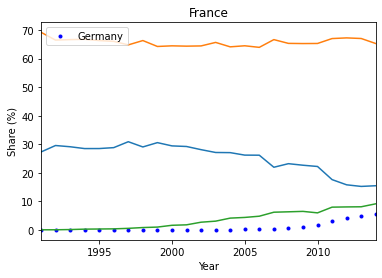

In [49]:
#Wykres ZABAWA
fig, ax = plt.subplots()
ax.plot(Niemcy_solar['year'],Niemcy_solar['%share'], marker = '.', linestyle = 'None', color = 'b', label = 'Germany')
ax.plot(Niemcy_nuclear['year'],Niemcy_nuclear['%share'])
ax.plot(Niemcy_thermal['year'],Niemcy_thermal['%share'])
ax.plot(Niemcy_wind['year'],Niemcy_wind['%share'])
ax.set_xlabel('Year')
plt.xlim([1991,2014])
ax.set_ylabel('Share (%)')
ax.set_title('France')
ax.legend(loc='upper left')
plt.show()

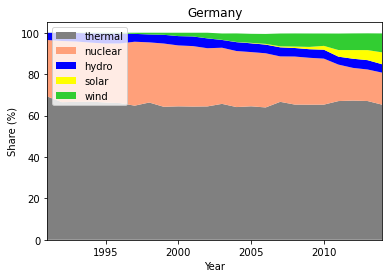

In [66]:
#Wykres Niemcy
fig, ax1 = plt.subplots()
ax1.stackplot(Niemcy_thermal['year'],Niemcy_thermal['%share'],Niemcy_nuclear['%share'],Niemcy_hydro['%share'],Niemcy_solar['%share'],Niemcy_wind['%share'],labels=['thermal','nuclear','hydro','solar','wind'], colors=['grey','lightsalmon','blue','yellow','limegreen'])
ax1.set_xlabel('Year')
plt.xlim([1991,2014])
ax1.set_ylabel('Share (%)')
ax1.set_title('Germany')
ax1.legend(loc='upper left')
plt.show()

In [51]:
Francja_wind

,commodity_transaction,year,quantity,%share
20,Electricity - total wind production,1993,2.0,0.00
27,Electricity - total wind production,1994,5.0,0.00
34,Electricity - total wind production,1995,5.0,0.00
41,Electricity - total wind production,1996,7.0,0.00
48,Electricity - total wind production,1997,11.0,0.00
55,Electricity - total wind production,1998,19.0,0.00
62,Electricity - total wind production,1999,37.0,0.01
69,Electricity - total wind production,2000,48.0,0.01
76,Electricity - total wind production,2001,131.0,0.02
83,Electricity - total wind production,2002,265.0,0.05


In [52]:
#Uzupełniam dane Francja_wind o brakujące lata 
Francja_wind2 = Francja_wind.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1991, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_wind3 = Francja_wind2.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1992, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_wind = Francja_wind3.append({'commodity_transaction': 'Electricity - total wind production', 'year': 1990, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_wind.sort_values('year', inplace=True)

In [53]:
Francja_solar

,commodity_transaction,year,quantity,%share
24,Electricity - total solar production,1994,1.0,0.00
31,Electricity - total solar production,1995,1.0,0.00
38,Electricity - total solar production,1996,1.0,0.00
45,Electricity - total solar production,1997,2.0,0.00
52,Electricity - total solar production,1998,2.0,0.00
59,Electricity - total solar production,1999,2.0,0.00
66,Electricity - total solar production,2000,5.0,0.00
73,Electricity - total solar production,2001,6.0,0.00
80,Electricity - total solar production,2002,7.0,0.00
87,Electricity - total solar production,2003,8.0,0.00


In [54]:
#Uzupełniam dane Francja_solar o brakujące lata 
Francja_solar2 = Francja_solar.append({'commodity_transaction': 'Electricity - total solar production', 'year': 1991, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_solar3 = Francja_solar2.append({'commodity_transaction': 'Electricity - total solar production', 'year': 1992, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_solar4 = Francja_solar3.append({'commodity_transaction': 'Electricity - total solar production', 'year': 1990, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_solar = Francja_solar4.append({'commodity_transaction': 'Electricity - total solar production', 'year': 1990, 'quantity': 0, '%share':0}, ignore_index=True)
Francja_solar.sort_values('year', inplace=True)

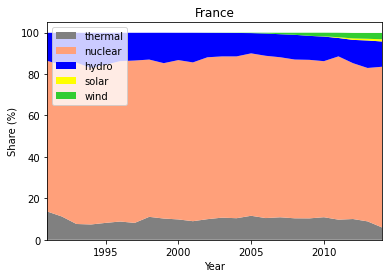

In [64]:
#Wykres Francja
fig, ax2 = plt.subplots()
ax2.stackplot(Francja_thermal['year'],Francja_thermal['%share'],Francja_nuclear['%share'],Francja_hydro['%share'],Francja_solar['%share'],Francja_wind['%share'],labels=['thermal','nuclear','hydro','solar','wind'],colors=['grey','lightsalmon','blue','yellow','limegreen'])
ax2.set_xlabel('Year')
plt.xlim([1991,2014])
ax2.set_ylabel('Share (%)')
ax2.set_title('France')
ax2.legend(loc='upper left')
plt.show()


In [56]:
Polska_final

,commodity_transaction,year,quantity,%share
0,Electricity - Gross production,1990,136311.0,100.000000
1,Electricity - total hydro production,1990,3313.0,2.430471
2,Electricity - total thermal production,1990,132998.0,97.569529
3,Electricity - Gross production,1991,134714.0,100.000000
4,Electricity - total hydro production,1991,3411.0,2.532031
5,Electricity - total thermal production,1991,131303.0,97.467969
6,Electricity - Gross production,1992,132750.0,100.000000
7,Electricity - total hydro production,1992,3570.0,2.689266
8,Electricity - total thermal production,1992,129180.0,97.310734
9,Electricity - Gross production,1993,133867.0,100.000000


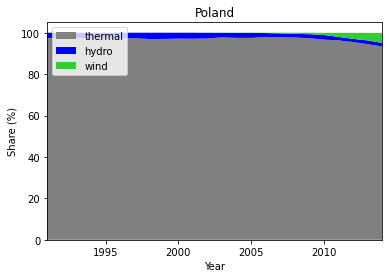

In [65]:
#Wykres Polska
fig, ax3 = plt.subplots()
ax3.stackplot(Polska_thermal['year'],Polska_thermal['%share'],Polska_hydro['%share'],Polska_wind['%share'],labels=['thermal','hydro','wind'],colors=['grey','blue','limegreen'])
ax3.set_xlabel('Year')
plt.xlim([1991,2014])
ax3.set_ylabel('Share (%)')
ax3.set_title('Poland')
ax3.legend(loc='upper left')
plt.show()



In [67]:
#Obróbka danych dla Dania
Dania_filtered = Dania[(Dania.category.isin(energy)) & (~Dania['commodity_transaction'].isin(not_interesting)) & (Dania.transaction_type.str.contains('production'))][['commodity_transaction','year','quantity']].sort_values(['year','commodity_transaction'], ascending = True)
Dania_gross = Dania_filtered[Dania_filtered['commodity_transaction'] == 'Electricity - Gross production'][['year','quantity']]
Dania_final = Dania_filtered.merge(Dania_gross, how='left', on='year')
Dania_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)
Dania_final['%share'] = Dania_final['quantity']/Dania_final['total_quantity']*100
Dania_final.drop(columns=['total_quantity'], inplace=True)


In [68]:
Dania_nuclear = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total nuclear production']
Dania_hydro = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total hydro production']
Dania_thermal = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total thermal production']
Dania_tide = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total tide, wave production']
Dania_wind = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total wind production']
Dania_solar = Dania_final[Dania_final['commodity_transaction'] == 'Electricity - total solar production']


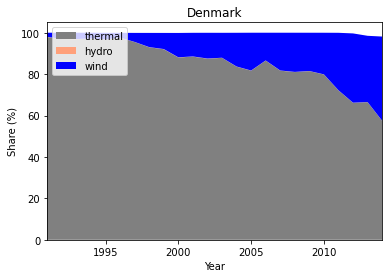

In [79]:
#Wykres Dania
fig, ax2 = plt.subplots()
ax2.stackplot(Dania_thermal['year'],Dania_thermal['%share'],Dania_hydro['%share'],Dania_wind['%share'],labels=['thermal','hydro','wind'],colors=['grey','lightsalmon','blue','yellow','limegreen'])
ax2.set_xlabel('Year')
plt.xlim([1991,2014])
ax2.set_ylabel('Share (%)')
ax2.set_title('Denmark')
ax2.legend(loc='upper left')
plt.show()


In [80]:
#NOTATKI: POLSKA SOLAR I DENMARK SOLAR DO UZUPEŁNIENIA